<a href="https://colab.research.google.com/github/taravskayavm/-Parkinsons-Disease/blob/main/Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git init
!git add README.md
!git commit -m "первая фиксация"
!git Branch -M main
!git Remote Add Origin https://github.com/taravskyvm/Parkinson-s_Disease. git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	Parkinson-s_Disease/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
git: 'Branch' is not a git command. See 'git --help'.

The most similar command is
	branch
git: 'Remote' is not a git command. See 'git --help'.

The most similar command i

In [ ]:
!git remote add origin https://github.com/taravskayavm/Parkinson-s_Disease.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'parkinsons-disease-dataset-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5194886%2F8668551%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240627%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240627T110311Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D72cc4daf8a5b2abdec3e10d3cf2249c8a357af5a8441b49110a1c9083231f79f10b152c6956a92b7e61880125f4835f33c5cb9948f82638860c3320aab644a051bb1c7c7cfab9af7eed872679139c71b0d08f2089b94fb4bc7ecaf840539a601a89ef1e3adf28505ac8f7e483176060a9d1ffdd9954e6d9827612c591ed2421b2fd357aeb15bb798b3a4db906a3ae8b4d28b77b3e454313704778e73055d4f58673b16661905616196a6b3ca2478c5503400caf835e9d1c68671ecee8ce79f2317ede08e20fcef09444161405eb2ea9357ab1400f5a9e5458c15b3d63418aaa71d18d5f8f3449ddbe29459cf6e175afab5ff6e9865183b64b5f8fc95374abb17'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.grid'] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv


In [ ]:
df = pd.read_csv('/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [ ]:
del df['DoctorInCharge']
del df['PatientID']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

In [ ]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Определение признаков и целевой переменной
X = df.drop('Diagnosis', axis=1)  # Признаки
y = df['Diagnosis']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Важность факторов
importances = model.feature_importances_

# Создание DataFrame для важности факторов
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Сортировка факторов по важности
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
22                     UPDRS    0.234973
24      FunctionalAssessment    0.102214
23                      MoCA    0.081505
25                    Tremor    0.081190
26                  Rigidity    0.040690
27              Bradykinesia    0.032583
8                DietQuality    0.032231
21  CholesterolTriglycerides    0.030755
18          CholesterolTotal    0.030051
4                        BMI    0.030050
7           PhysicalActivity    0.029714
6         AlcoholConsumption    0.029437
0                        Age    0.029354
19            CholesterolLDL    0.028473
16                SystolicBP    0.028027
9               SleepQuality    0.027942
20            CholesterolHDL    0.026889
17               DiastolicBP    0.026679
28       PosturalInstability    0.019964
3             EducationLevel    0.009727
2                  Ethnicity    0.007562
14                Depression    0.005112
1                     Gender    0.004912
30            Sl

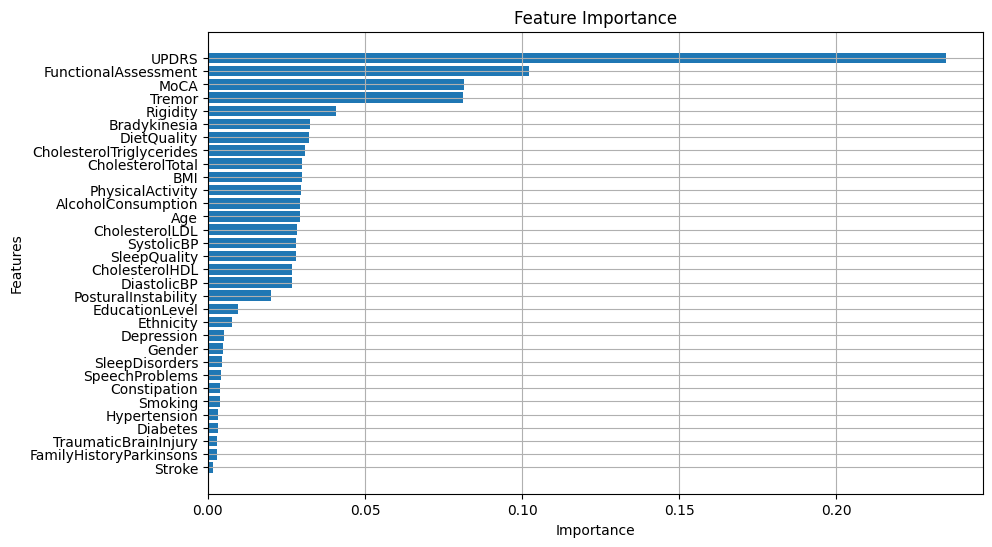

In [ ]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))

plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Предсказания на тестовых данных
y_pred = model.predict(X_test)

In [ ]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[137  13]
 [ 26 245]]


In [ ]:
# Отчет по классификации
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       150
           1       0.95      0.90      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.90       421
weighted avg       0.91      0.91      0.91       421



In [ ]:
# ROC-кривая и AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.2f}')

AUC: 0.94


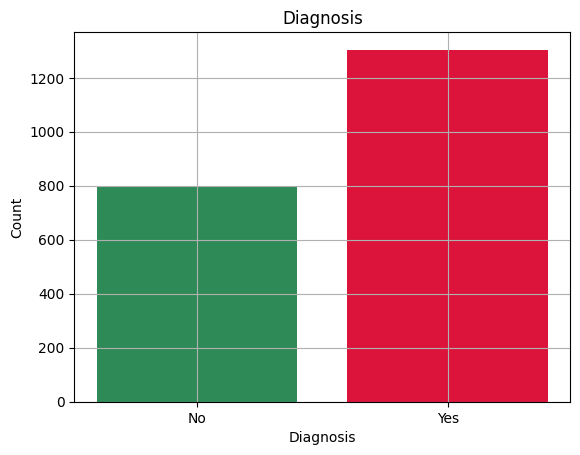

In [ ]:
data = pd.DataFrame(df)

# Подсчет количества значений 0 и 1
counts = data['Diagnosis'].value_counts()

# Построение столбчатой диаграммы
plt.bar(counts.index, counts.values, color=['#DC143C', '#2E8B57'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis')
plt.show()

## SHAP-интерпретация модели

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import shap

Accuracy: 0.91
AUC: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       150
           1       0.96      0.90      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.92       421

Confusion Matrix:
[[141   9]
 [ 27 244]]


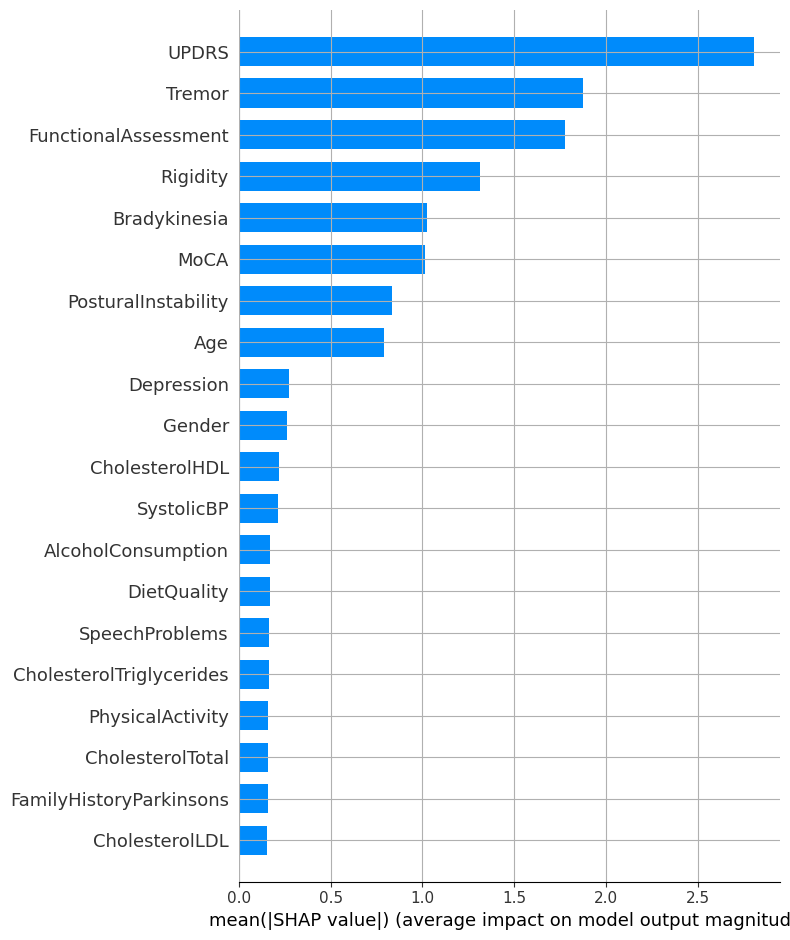

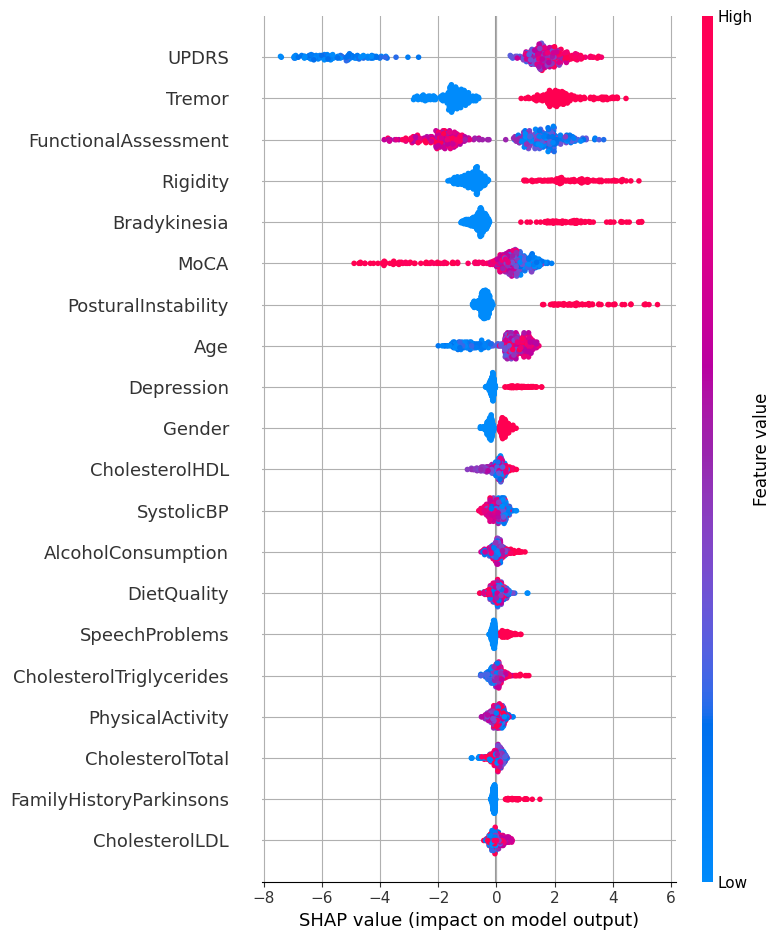

In [ ]:
# Определение признаков и целевой переменной
X = df.drop('Diagnosis', axis=1)  # Полный набор признаков
y = df['Diagnosis']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Создание и обучение модели XGBoost
best_model = XGBClassifier()
best_model.fit(X_train_res, y_train_res)

# Оценка модели
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(conf_matrix)

# Использование SHAP для интерпретации модели
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Визуализация важности признаков с помощью бар-графика
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Визуализация всех значений SHAP
shap.summary_plot(shap_values, X_test)